In [21]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
pwd

'/Users/cgu3/Library/CloudStorage/OneDrive-InsideMDAnderson/proteomics/project/PPI-for-protein-detection/python-analysis'

In [3]:
%connect_info
%qtconsole

{
  "shell_port": 56997,
  "iopub_port": 56998,
  "stdin_port": 57000,
  "control_port": 57002,
  "hb_port": 57001,
  "ip": "127.0.0.1",
  "key": "9c73e40a-7a032066f620132f08ad80ba",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-db82466d-e59e-4762-b430-28bdffa61db0.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


Import data from csv fies

In [4]:
nextprot_dat = pd.read_csv('../data/nextprot-proteins.csv')
nextprot_dat.head()

,acc_code,protein_name,gene_name_s,chromosome,proteomics,disease,structure,number_isof,number_variants,number_ptms,mutagenesis,tissue_expr,pe
0,A0A024RBG1,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,1q21.2,yes,no,no,1,0,0,no,yes,Evidence at protein level
1,A0A075B6H7,Probable non-functional immunoglobulin kappa v...,IGKV3-7,2p11.2,yes,no,no,1,187,1,no,yes,Evidence at protein level
2,A0A075B6H8,Probable non-functional immunoglobulin kappa v...,IGKV1D-42,2p11.2,yes,no,no,1,140,1,no,yes,Evidence at protein level
3,A0A075B6H9,Immunoglobulin lambda variable 4-69,IGLV4-69,22q11.22,yes,no,no,1,318,1,no,yes,Evidence at protein level
4,A0A075B6I0,Immunoglobulin lambda variable 8-61,IGLV8-61,22q11.22,yes,no,no,1,256,1,no,yes,Evidence at protein level


In [5]:
ppi_dat = pd.read_csv('../data/STRING/STRING-interaction-swiss.csv')
ppi_dat.head()

,protein1_acc,protein2_acc,combined_score
0,P84085,Q14123,155
1,P84085,Q13177,197
2,P84085,O95755,222
3,P84085,Q13905,181
4,P84085,Q15057,767


In [6]:
proteins = pd.read_csv('../data/proteins-sample-0981.csv')
proteins = proteins[proteins['protein_accession'].isin(nextprot_dat['acc_code'])]
proteins.head()

,protein_accession,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_auto_curate,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
0,Q96EG1,0.0,57913.1781,0,1,33,0.0,2767,0.0,339,Green,5.981677,0,0
1,Q8TEX9,0.0,120633.6768,3,1,84,0.0,1469,0.0,488,Red,6.113683,0,0
2,Q0VDD8,0.0,405223.5318,10,3,268,0.0,13319,0.0,2544,Red,19.128590,0,0
3,Q9HCH5,0.0,105285.2734,1,3,85,0.0,130667,0.0,422,Green,28.732410,0,0
4,Q9BYN7,0.0,95001.7193,7,2,43,0.0,3633,0.0,1708,Red,7.312799,0,0


In [7]:
proteins.describe()

,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
count,10628.000000,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.000000,1.062800e+04,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.0
mean,126.834218,8.318720e+04,6.988709,2.125706,55.387561,5.013868,5.208421e+04,6.981194e+03,2580.636714,12.854394,4.344938,0.0
std,574.916775,7.532698e+04,5.472866,1.499351,50.465219,5.842536,1.744397e+05,6.939676e+04,7427.548638,11.681110,3.039798,0.0
min,0.000000,2.391932e+03,0.000000,1.000000,1.000000,0.000000,1.250000e+03,0.000000e+00,0.000000,3.584394,0.000000,0.0
25%,10.581900,3.938988e+04,3.000000,1.000000,26.000000,1.750000,4.299750e+03,0.000000e+00,591.000000,6.651505,3.000000,0.0
50%,26.929400,6.208700e+04,6.000000,2.000000,42.000000,3.150000,1.223550e+04,0.000000e+00,1196.000000,9.408626,3.000000,0.0
75%,76.026575,1.025665e+05,9.000000,3.000000,69.000000,6.020000,3.778425e+04,0.000000e+00,2413.000000,14.720907,5.000000,0.0
max,21668.070000,1.521735e+06,81.000000,27.000000,788.000000,80.260000,6.112216e+06,3.433368e+06,391390.000000,302.534400,65.000000,0.0


In [8]:
uniprot_dat = pd.read_table('../data/uniprot_protein_entries.tsv', sep='\t')
uniprot_dat.head()

,Entry,Entry Name,Protein names,Organism,Length,Mass,Gene Names (primary)
0,A0A087X1C5,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),Homo sapiens (Human),515,57489,CYP2D7
1,A0A0B4J2F0,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),Homo sapiens (Human),54,6313,PIGBOS1
2,A0A0B4J2F2,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,Homo sapiens (Human),783,84930,SIK1B
3,A0A0C5B5G6,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,Homo sapiens (Human),16,2175,MT-RNR1
4,A0A0K2S4Q6,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,Homo sapiens (Human),201,21806,CD300H


## augment node attributes with protein information from nextprot

## Proteins in PPI dataset but not in protein dataset
The protein dataset contain protein existence evidence information from an experiment (mostly  calculated protein identification features from MS spectrum)

The number of unique proteins in protein dataset and PPI dataset may not be the same.
We can either: 1. create those new protein entry in the protein dataset
or 2. only use PPI interaction information about proteins that exist in the protein dataset

In [9]:
# use approach 2 for simplicity
ppi_dat = ppi_dat[ppi_dat.protein1_acc.isin(proteins.protein_accession) & ppi_dat.protein2_acc.isin(proteins.protein_accession)]

# Create customized dataset

In [10]:
# need to define some helper encoder and transformer class

class LogTransformation(object):
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(np.log10(df.values+ 1)).view(-1, 1).to(self.dtype)

can use it to generate a new score and see if it can bimodal for FDR to discover new  proteins

In [11]:
import pandas as pd
dat_7103 = pd.read_csv('../data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv', index_col='protein.Accession')
dat_7103.head()

,protein.key,protein.Entry,protein.Description,protein.dataBaseType,protein.score,protein.falsePositiveRate,protein.avgMass,protein.MatchedProducts,protein.matchedPeptides,protein.digestPeps,...,protein.top3MatchedPeptideIntenSum,protein.MatchedProductIntenSum,protein.fmolOnColumn,protein.ngramOnColumn,protein.AutoCurate,protein.sumNumBYCalc,protein.sumNumBYPepFrag1,protein.AccessionKey_ForHomologs,protein.Key_ForHomologs,protein.numUniquePeptides
protein.Accession,,,,,,,,,,,,,,,,,,,,,
A0A075B6I1,71922,A0A075B6I1_HUMAN,Protein IGLV4-60 (Fragment) OS=Homo sapiens GN...,Regular,29.8800,20.82,13200.6299,3,1,7,...,0.0,672.0,NaN,NaN,Red,4.910510,3,NaN,NaN,0
A0A075B6I6,71925,A0A075B6I6_HUMAN,Protein IGLV1-50 (Fragment) OS=Homo sapiens GN...,Regular,60.2326,26.57,12551.8520,4,1,6,...,0.0,2246.0,NaN,NaN,Red,4.086504,4,NaN,NaN,0
A0A075B6K5,71935,A0A075B6K5_HUMAN,HCG2043239 (Fragment) OS=Homo sapiens GN=IGLV3...,Regular,41.5748,32.59,12473.8112,6,2,8,...,0.0,1132.0,NaN,NaN,Red,5.572281,3,NaN,NaN,0
A0A075B6N4,71943,A0A075B6N4_HUMAN,Protein TRBV25-1 (Fragment) OS=Homo sapiens GN...,Regular,146.0436,1.52,13195.8990,3,1,7,...,0.0,233.0,NaN,NaN,Green,4.525743,3,A0A0G2JMG7 A0A0G2JNG9 A0A1B0GTL4 A0A1B0GWK1 A0...,4752 4882 6490 7274 7432,0
A0A075B6P5,71944,KV228_HUMAN,Immunoglobulin kappa variable 2-28 OS=Homo sap...,Regular,368.3212,2.40,13098.8636,9,2,5,...,0.0,10153.0,NaN,NaN,Yellow,11.621240,9,A0A087WW87 A0A087X0P6 A0A087X0Q4 A0A075B6S2 A0...,1015 2033 2038 71951 71954 72185 75732 75733 7...,0


In [12]:
perc_1 = np.percentile(dat_7103['protein.falsePositiveRate'], 1)
perc_99 = np.percentile(dat_7103['protein.falsePositiveRate'], 99)

In [13]:
confident_positive_proteins = dat_7103[(dat_7103['protein.falsePositiveRate'] <= perc_1)].index.to_list()
confident_negative_proteins = dat_7103[(dat_7103['protein.falsePositiveRate'] >= perc_99)].index.to_list()

In [14]:
# confident_positive_proteins = dat_7103[(dat_7103['protein.falsePositiveRate'] < 1) & (dat_7103['protein.matchedPeptides'] >= 2)].to_list()
# confident_negative_proteins = dat_7103[(dat_7103['protein.falsePositiveRate'] < 1) & (dat_7103['protein.matchedPeptides'] >= 2)].to_list()
# protein_reference = dat_7103.index[dat_7103['protein.falsePositiveRate'] < 5].to_list()

In [15]:
ppi = pd.read_csv('../data/STRING/STRING-interaction-swiss.csv')
protein1 = ppi.protein2_acc.to_list()
protein2 = ppi.protein1_acc.to_list()

Check the number of proteins covered by the interaction database

In [16]:
dat_7103.index.isin(protein1 + protein2).astype(int).mean()

0.9515202573332312

In [17]:
! use the multiple sample result of ground-true label...? for evaluation...

zsh:1: no matches found: label...?


In [18]:

def load_node_csv(path: str, index_col: str, numeric_cols: list, encoders: object=None, protein_reference:'[iterable, iterable]'=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # extract feature doesn't need encoder
    x = torch.tensor(df.loc[:, numeric_cols].values, dtype=torch.float)
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x2 = torch.cat(xs, dim=-1).view(-1, 1)
        x = torch.hstack([x, x2])


    # based on protein reference set to create group-true label
    confident_positive_proteins, confident_negative_proteins =protein_reference
    y = np.where(df.index.isin(confident_positive_proteins), 1, (np.where(df.index.isin(confident_negative_proteins), 0, -1)))
    y = torch.tensor(y).view(-1).to(dtype=torch.long)

    return x, mapping, y

In [19]:
# ? how to encode the same for two data?

# class CategoricalEncoder(object):
#     def __init__(self, device=None):
#         self.device = device
#         self.model = LabelEncoder()
#
#     @torch.no_grad()
#     def __call__(self, df):
#         x = self.model.fit_transform(df)
#         x = torch.tensor(x)
#         return x.to(self.device)

In [20]:
numeric_cols = ['protein.avgMass', 'protein.MatchedProducts', 'protein.matchedPeptides', 'protein.digestPeps', 'protein.seqCover(%)', 'protein.MatchedPeptideIntenSum', 'protein.top3MatchedPeptideIntenSum', 'protein.MatchedProductIntenSum', 'protein.sumNumBYCalc', 'protein.sumNumBYPepFrag1', 'protein.falsePositiveRate']
# numeric_cols = ['protein.matchedPeptides', 'protein.seqCover(%)', 'protein.falsePositiveRate']
#  'protein.falsePositiveRate'

In [21]:
x_7103, mapping_7103, y_7103 = load_node_csv('../data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv', index_col='protein.Accession',numeric_cols=numeric_cols, protein_reference=[confident_positive_proteins, confident_negative_proteins])

In [22]:
import torch
def load_edge_csv(path: str, src_index_col: str, dst_index_col: str, mapping: dict,
                  numeric_cols: list, encoders: dict=None, undirected: bool=True, **kwargs):
    df = pd.read_csv(path, **kwargs)

    # only keep interactions related to proteins that in the protein dataset (i.e. in mapping keys)
    protein_data_acc = mapping.keys()
    df = df[df.protein1_acc.isin(protein_data_acc) & df.protein2_acc.isin(protein_data_acc)]

    src = [mapping[index] for index in df[src_index_col]]
    dst = [mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if numeric_cols is not None:
        edge_attr = torch.tensor(df.loc[:, numeric_cols].values, dtype=float)

    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    # add reversed edges if the graph is undirected
    if undirected:
        edge_index_reverse = torch.tensor([dst, src])
        edge_index = torch.cat([edge_index, edge_index_reverse], dim=-1)
        edge_attr = torch.vstack([edge_attr, edge_attr])

    return edge_index, edge_attr

In [23]:

import os.path as osp
p = osp.join('../data/STRING/STRING-interaction-swiss.csv', 'a')

In [24]:
edge_index_7103, edge_attr_7103 = load_edge_csv('../data/STRING/STRING-interaction-swiss.csv', src_index_col='protein1_acc', dst_index_col='protein2_acc', mapping=mapping_7103,
               numeric_cols=['combined_score'])

# use the two graph to create a Dataset object

In [25]:
loss_mask = np.where(y_7103 == -1, 0, 1)

In [26]:
from torch_geometric.data import Data
# data_0981 = Data(x=x_0981, edge_index=edge_index_0981, split=1, edge_attr=edge_attr_0981, y=y_0981)
data_7103 = Data(x=x_7103, edge_index=edge_index_7103, split=1, edge_attr=edge_attr_7103, y=y_7103, loss_mask=torch.tensor(loss_mask, dtype=torch.long))

In [27]:
import torch_geometric.transforms as T
import random
random.seed(1000)
split_transformer = T.RandomNodeSplit(split='train_rest', num_splits=1, num_val=0.2, num_test=0.2)
# data_0981 = split_transformer(data_0981)
data_7103 = split_transformer(data_7103)

In [28]:
dataset = data_7103
print(f'Number of nodes: {dataset.num_nodes}')
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of edges: {dataset.num_edges}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Average node degree: {dataset.num_edges / dataset.num_nodes:.2f}')
print(f'Number of training nodes: {dataset.train_mask.sum()}')
print(f'Training node label rate: {int(dataset.train_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Validation node label rate: {int(dataset.val_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Test node label rate: {int(dataset.test_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Has isolated nodes: {dataset.has_isolated_nodes()}')
print(f'Has self-loops: {dataset.has_self_loops()}')
print(f'Is undirected: {dataset.is_undirected()}')

Number of nodes: 13057
Number of node features: 11
Number of edges: 13210320
Number of edge features: 1
Average node degree: 1011.74
Number of training nodes: 7835
Training node label rate: 0.60
Validation node label rate: 0.20
Test node label rate: 0.20
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [29]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# data_list = [data_7103, data_0981]
data_list = [data_7103]
loader = DataLoader(data_list)

# Training

In [30]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        self.bn1 = torch.nn.BatchNorm1d(2*num_node_features)
        self.bn2 = torch.nn.BatchNorm1d(2*num_node_features)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        # x = self.bn1(x) # batchnormalize make train acc start from high value (~0.7) why?
        x = x.relu()
        # x = F.dropout(x, p=0.5, training=self.training) # does transductive model need use dropout?
        x = self.conv2(x, edge_index)
        return x


In [31]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def train(model, loader, criterion, optimizer, scheduler=None):
    model.train()
    optimizer.zero_grad()  # Clear gradients.


    total_loss = 0
    total_correct = 0
    total_num_nodes = 0


    for data in loader:

        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        mask = torch.logical_and(data.train_mask, data.loss_mask)
        loss = criterion(out[mask], data.y[mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[mask] == data.y[mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += mask.sum()
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients
        if scheduler is not None:
            scheduler.step()
        total_loss = loss + total_loss
        acc = total_correct / total_num_nodes

    #
    # # calculate validation metrics
    # val_loss_mask = torch.logical_and(data.val_mask, data.loss_mask)
    # val_loss = criterion(out[val_loss_mask], data.y[val_loss_mask])
    # val_correct = int((pred[val_loss_mask] == data.y[val_loss_mask]).sum())  # Check against ground-truth labels.
    # val_num_nodes = val_loss_mask.sum()
    # val_acc = val_correct/val_num_nodes


    return total_loss.detach().numpy(), acc


def val(model, loader, criterion):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        mask = torch.logical_and(data.val_mask, data.loss_mask)
        loss = criterion(out[mask], data.y[mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[mask] == data.y[mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc

def test(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        mask = torch.logical_and(data.test_mask, data.loss_mask)
        loss = criterion(out[mask], data.y[mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[mask] == data.y[mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc




<IPython.core.display.Javascript object>

In [33]:
import sklearn
import numpy as np
weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(data_7103.y), y=data_7103.y.numpy())
weights = torch.tensor(weights, dtype=torch.float)

In [34]:
weights

tensor([ 0.3498, 32.9722,  9.0297])

In [631]:
# def masked_softmax_cross_entropy(preds, labels, mask):
#     """Softmax cross-entropy loss with masking."""
#     cross_entropy_loss = torch.nn.CrossEntropyLoss(weight=weights, reduction='mean')
#     loss = cross_entropy_loss(preds[], labels)
#     mask = mask.type(torch.float32)
#     mask /= torch.mean(mask)
#     loss *= mask
#     return torch.mean(loss)

In [632]:
import torch
import torch.optim
from torch.optim import lr_scheduler
import torch.nn.functional as F

GCN_model = GCN(num_node_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
criterion = torch.nn.CrossEntropyLoss(weight=weights[1:],reduction='mean')
# sgd = torch.optim.SGD(GCN_model.parameters(), lr=0.001, weight_decay=1e-3)
adam = torch.optim.Adam(GCN_model.parameters(), lr=0.001)
# scheduler = lr_scheduler.StepLR(sgd, step_size=30, gamma=0.1)

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 100):
    train_loss, train_acc= train(GCN_model, loader=loader, optimizer=adam, criterion=criterion)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val(GCN_model, loader=loader, criterion=criterion)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    if (epoch % 10 == 0):
        torch.save({
            'epoch': epoch,
            'model_state_dict': GCN_model.state_dict(),
            'optimizer_state_dict': adam.state_dict(),
            'loss': train_loss},
            f='../data/output/checkpoints' + '_' + str(epoch))

    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

Epoch: 001, Train loss: 10888.3867 Train acc: 0.2453 Validation loss:  10788.3818, Validation acc: 0.2269
Epoch: 002, Train loss: 9961.8281 Train acc: 0.2507 Validation loss:  9877.6982, Validation acc: 0.2353
Epoch: 003, Train loss: 9047.2822 Train acc: 0.2668 Validation loss:  8971.7334, Validation acc: 0.2353
Epoch: 004, Train loss: 8149.0420 Train acc: 0.2776 Validation loss:  8068.6948, Validation acc: 0.2353
Epoch: 005, Train loss: 7276.0093 Train acc: 0.2830 Validation loss:  7168.8198, Validation acc: 0.2437
Epoch: 006, Train loss: 6418.8774 Train acc: 0.2911 Validation loss:  6296.9722, Validation acc: 0.2773
Epoch: 007, Train loss: 5581.0327 Train acc: 0.3181 Validation loss:  5461.4585, Validation acc: 0.2857
Epoch: 008, Train loss: 4784.2476 Train acc: 0.3423 Validation loss:  4644.0703, Validation acc: 0.3025
Epoch: 009, Train loss: 4020.7412 Train acc: 0.3666 Validation loss:  3875.5288, Validation acc: 0.3445
Epoch: 010, Train loss: 3316.8342 Train acc: 0.4097 Validation

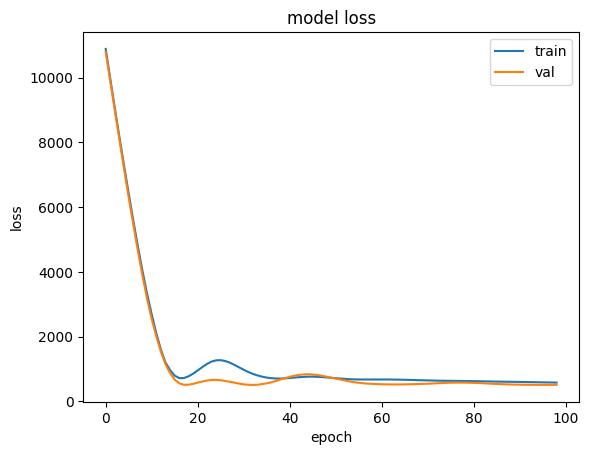

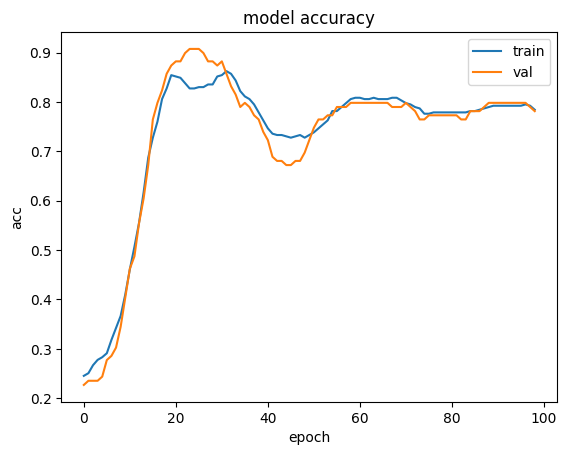

In [633]:
_ = plt.plot(train_loss_history);
_ = plt.plot(val_loss_history);
_ = plt.title('model loss');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

_ = plt.plot(train_acc_history);
_ = plt.plot(val_acc_history);
_ = plt.title('model accuracy');
_ = plt.ylabel('acc');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

Check whether model is just major-class guessing

In [615]:
# check output for test node set
mask = data_7103.test_mask
# mask = torch.logical_and(data_7103.test_mask, data_7103.loss_mask)
checkpoint = torch.load('../data/output/checkpoints_30')
model = GCN(num_node_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
model.load_state_dict(checkpoint['model_state_dict'])
adam.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

out = model(data_7103.x, data_7103.edge_index)  # Perform a single forward pass.
pred = out.argmax(dim=1)
pred[mask].bincount()
# data_7103.y[data_7103.test_mask].bincount()

<All keys matched successfully>

tensor([2611])

In [616]:
data_7103.y[mask]
pred[mask]

tensor([-1,  1, -1,  ..., -1, -1, -1])

tensor([0, 0, 0,  ..., 0, 0, 0])

In [617]:
test(model, loader)

(array(5089.201, dtype=float32), tensor(0.2101))

Text(0.5, 1.0, 'Test ROC')

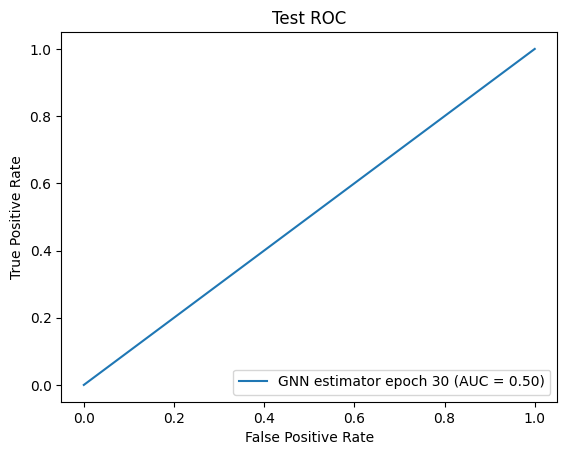

In [618]:
## AUC on test data
from sklearn import metrics
mask = torch.logical_and(data_7103.test_mask, data_7103.loss_mask)
probabilities = F.softmax(out[mask], dim=1)[:, 1]
y_score = probabilities.detach().numpy()
fpr, tpr, thresholds = metrics.roc_curve(data_7103.y[mask], y_score)
roc_auc = metrics.auc(fpr, tpr)
 # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='GNN estimator epoch ' + str(epoch))
roc_display.plot()
plt.title('Test ROC')
plt.show()

(array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

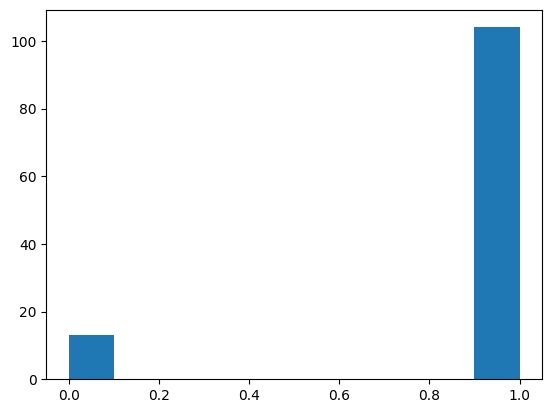

In [599]:
plt.hist(y_score)

In [177]:
# from sklearn.metrics import confusion_matrix
# label_GNN = pred[data_7103.test_mask].numpy()
# label_reference =  data_7103.y[data_7103.test_mask].numpy()
# confusion_matrix(label_reference, label_GNN)

In [427]:
test_positive = np.where(torch.logical_and(data_7103.test_mask == 1, pred == 1))
inv_map = {v: k for k, v in mapping_7103.items()}
acc_test_positive = [inv_map[idx] for idx in test_positive[0]]

In [540]:
test_negative = np.where(torch.logical_and(data_7103.test_mask == 1, pred == 0))
acc_test_negative = [inv_map[idx] for idx in test_negative[0]]

In [429]:
dat_7103.loc[acc_test_positive,:]

,protein.key,protein.Entry,protein.Description,protein.dataBaseType,protein.score,protein.falsePositiveRate,protein.avgMass,protein.MatchedProducts,protein.matchedPeptides,protein.digestPeps,...,protein.top3MatchedPeptideIntenSum,protein.MatchedProductIntenSum,protein.fmolOnColumn,protein.ngramOnColumn,protein.AutoCurate,protein.sumNumBYCalc,protein.sumNumBYPepFrag1,protein.AccessionKey_ForHomologs,protein.Key_ForHomologs,protein.numUniquePeptides
protein.Accession,,,,,,,,,,,,,,,,,,,,,
A0A075B767,72019,A0A075B767_HUMAN,Peptidyl-prolyl cis-trans isomerase OS=Homo sa...,Regular,5033.7410,0.00,18492.0361,8,1,10,...,0.0,180876.0,NaN,NaN,Green,60.294480,8,A0A0H2UH34 P62937-2 A0A075B759 A0A0B4J2A2 F5H2...,5320 52539 72018 72294 73502 76541 76542 79315...,0
A0A0A6YYK1,72239,A0A0A6YYK1_HUMAN,Protein TRAV8-1 (Fragment) OS=Homo sapiens GN=...,Regular,731.4138,0.15,12929.9078,3,1,8,...,4827.0,1521.0,NaN,NaN,Green,4.085073,3,NaN,NaN,0
A0A0B4J1V1,72253,HV321_HUMAN,Immunoglobulin heavy variable 3-21 OS=Homo sap...,Regular,64.3405,32.88,13052.7582,3,1,6,...,0.0,6510.0,NaN,NaN,Red,10.006670,3,A0A0J9YVT0 A0A0B4J1X5 A0A0C4DH42 A0A0J9YVY3 P0...,5338 72258 72329 72422 75755 75756 75759 75761...,0
A0A0B4J2F2,72305,A0A0B4J2F2_HUMAN,Protein LOC102724428 OS=Homo sapiens GN=LOC102...,Regular,111.2688,16.19,86280.0965,18,5,41,...,0.0,6567.0,NaN,NaN,Yellow,18.884690,3,P57059,78984,0
A0A0C4DH35,72324,A0A0C4DH35_HUMAN,Protein IGHV3-35 (Fragment) OS=Homo sapiens GN...,Regular,139.8962,17.46,13023.5776,10,3,9,...,0.0,8294.0,NaN,NaN,Red,9.034238,4,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6M9,92856,NDUB9_HUMAN,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Regular,1233.1240,0.30,22115.1231,26,5,20,...,0.0,159996.0,NaN,NaN,Green,47.703150,14,E7EWZ0 E9PF49 E9PH64,19291 19708 19873,0
Q9Y6Q5,92868,AP1M2_HUMAN,AP-1 complex subunit mu-2 OS=Homo sapiens GN=A...,Regular,129.4958,11.99,48250.6449,4,1,33,...,0.0,1339.0,NaN,NaN,Yellow,7.915784,4,E7ENJ6 K7EJJ1 K7EJL1 K7EMG5 K7EPR4 Q9BXS5-2 Q9...,18438 42580 42596 43395 44013 65913 70299 89128,0
Q9Y6Q9,92870,NCOA3_HUMAN,Nuclear receptor coactivator 3 OS=Homo sapiens...,Regular,14.5670,29.00,156430.4088,10,3,90,...,0.0,19069.0,NaN,NaN,Green,40.233900,6,Q9Y6Q9-2 Q9Y6Q9-3 Q9Y6Q9-4 Q9Y6Q9-5,70305 70306 70307 70308,0


In [430]:
uniprot_dat[uniprot_dat.Entry.isin(acc_test_positive)]

,Entry,Entry Name,Protein names,Organism,Length,Mass,Gene Names (primary)
2,A0A0B4J2F2,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,Homo sapiens (Human),783,84930,SIK1B
7,A0A5B9,TRBC2_HUMAN,T cell receptor beta constant 2,Homo sapiens (Human),178,19968,TRBC2
13,A0AVT1,UBA6_HUMAN,Ubiquitin-like modifier-activating enzyme 6 (U...,Homo sapiens (Human),1052,117970,UBA6
16,A0JLT2,MED19_HUMAN,Mediator of RNA polymerase II transcription su...,Homo sapiens (Human),244,26273,MED19
39,A1L4K1,FSD2_HUMAN,Fibronectin type III and SPRY domain-containin...,Homo sapiens (Human),749,85385,FSD2
...,...,...,...,...,...,...,...
19922,Q9BYD9,ACTT3_HUMAN,Actin-related protein T3 (ARP-T3) (Actin-relat...,Homo sapiens (Human),372,41008,ACTRT3
19974,Q9NQ32,CK016_HUMAN,Uncharacterized protein C11orf16,Homo sapiens (Human),467,51609,C11orf16
20216,Q56UQ5,TPT1L_HUMAN,TPT1-like protein,Homo sapiens (Human),140,15757,NaN
20232,Q5VT40,FA78B_HUMAN,Protein FAM78B,Homo sapiens (Human),261,29835,FAM78B


In [433]:
dat_7103 = dat_7103.reset_index().merge(uniprot_dat, left_on='protein.Accession', right_on='Entry').set_index('protein.Accession')

In [435]:
dat_7103_test_positive = dat_7103[dat_7103.Entry.isin(acc_test_positive)]
dat_7103_test_positive_short = dat_7103_test_positive.loc[:, ['Gene Names (primary)', 'protein.matchedPeptides']]

In [436]:
rna_dat = pd.read_csv('../data/RNA/TPM_gastric_cancer_primary_cell.csv', index_col=0, header=0)
rna_dat.head()

,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
A1BG,0.121445,0.973642,1.899031,8.080447,0.890998,2.006780,2.514704,3.400409
A1BG-AS1,0.696011,1.373207,8.956204,137.332073,5.648928,45.003946,7.205980,7.011729
A1CF,3.608865,5.067146,7.310695,0.000000,6.431744,1.547249,0.000000,6.306374
A2M,6.777727,3.250278,606.620777,6.089779,34.548676,678.042653,0.287000,525.346005
A2M-AS1,0.859071,3.443644,10.696843,2.846998,18.067694,24.687715,27.670778,2.166991


In [437]:
dat_7103_tpm_ms = dat_7103_test_positive_short.merge(rna_dat['IP7103_1701'], left_on='Gene Names (primary)', right_index=True)
dat_7103_tpm_ms.rename(columns={'IP7103_1701': 'TPM'}, inplace=True)
dat_7103_tpm_ms['TPM'] = np.log(dat_7103_tpm_ms['TPM'] + 1)
dat_7103_tpm_ms.head()

,Gene Names (primary),protein.matchedPeptides,TPM
protein.Accession,,,
A0A075B767,PPIAL4H,1,0.0
A0A0A6YYK1,TRAV8-1,1,0.0
A0A0B4J1V1,IGHV3-21,1,0.0
A0A0C4DH35,IGHV3-35,3,0.0
A0A0J9YWP8,TRBJ1-3,1,0.0


In [438]:
dat_7103_tpm_ms.shape
(dat_7103_tpm_ms['TPM'] > 0).sum()

(1539, 3)

1276

In [262]:
# plt.scatter(dat_7103_tpm_ms['protein.matchedPeptides'], dat_7103_tpm_ms['TPM'])

## Check positive protein predicted by FDR approach

In [518]:
test_proteins = np.where(data_7103.test_mask == 1)
acc_test = [inv_map[idx] for idx in test_proteins[0]]

In [519]:
dat_7103_test = dat_7103[dat_7103.index.isin(acc_test)]
dat_7103_high_fdr = dat_7103_test[dat_7103_test['protein.falsePositiveRate'] < 28]
# check the intersectio between GNN prediction and FDR predition
# len(set(dat_7103_fdr_40.Entry).intersection(set(dat_7103_test_positive.Entry)))
dat_7103_high_fdr_short = dat_7103_high_fdr[['Gene Names (primary)', 'protein.matchedPeptides']]
dat_7103_high_fdr_short

,Gene Names (primary),protein.matchedPeptides
protein.Accession,,
A0A075B6I1,IGLV4-60,1
A0A075B767,PPIAL4H,1
A0A087WT03,TRAV26-1,1
A0A0A6YYK1,TRAV8-1,1
A0A0B4J1W7,NPIPA9,4
...,...,...
Q9Y6Q5,AP1M2,1
Q9Y6R7,FCGBP,2
Q9Y6W3,CAPN7,1


In [541]:
dat_7103_high_fdr_negative = dat_7103_test[dat_7103_test['protein.falsePositiveRate'] >= 28]

In [542]:
# positive protein based on FDR criterion
fdr_positive = np.where(dat_7103.index.isin(dat_7103_high_fdr.index))
fdr_negative = np.where(dat_7103.index.isin(dat_7103_high_fdr_negative.index))

In [543]:
test_positive = np.where(torch.logical_and(data_7103.test_mask == 1, pred == 1))
inv_map = {v: k for k, v in mapping_7103.items()}
acc_fdr_positive = [inv_map[idx] for idx in fdr_positive[0]]
acc_fdr_negative = [inv_map[idx] for idx in fdr_negative[0]]

In [460]:
# merge MS and RNA data based on Gene Name
dat_7103_fdr_40_short = dat_7103_high_fdr_short.merge(rna_dat['IP7103_1701'], left_on='Gene Names (primary)', right_index=True)
dat_7103_fdr_40_short.rename(columns={'IP7103_1701': 'TPM'}, inplace=True)
dat_7103_fdr_40_short['TPM'] = np.log(dat_7103_fdr_40_short['TPM'] + 1)

In [457]:
# calculate the proportion of rna support proteins in predicted positive proteins from FDR approach
dat_7103_fdr_40_short.shape
number_rna_supported = (dat_7103_fdr_40_short['TPM'] > 0).sum()
number_rna_supported/dat_7103_fdr_40_short.shape[0]

(1520, 3)

0.7875

## Check overlapping between two predicted positive protein sets

In [461]:
len(set(dat_7103_high_fdr['protein.Entry']).intersection(set(dat_7103_test_positive['protein.Entry'])))

1078

In [263]:
# plt.scatter(dat_7103_fdr_40_short['protein.matchedPeptides'], dat_7103_fdr_40_short['TPM'])

# Check between result using the high reliability protein set

In [561]:
dat_spc = pd.read_csv('../data/gastric-primary-cell/gastric_primary_cell_count.csv')
dat_spc.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_spc = dat_spc[dat_spc['accession'].isin(nextprot_dat['acc_code'])]
dat_spc.head()

,accession,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
15,A0A075B6R2,0,0,0,0,0,0,1,0
110,A0A087WW87,0,3,2,0,0,0,0,0
181,A0A087X0M5,3,0,0,0,0,0,0,0
236,A0A096LP55,1,10,8,0,0,0,6,6
259,A0A0A0MS15,2,0,0,0,0,0,0,2


In [562]:
dat_spc = dat_spc.drop(['IP0981_1701', 'IP7103_1701'],axis=1)
dat_spc.set_index('accession', inplace=True)
reliable_positive_proteins = dat_spc[np.sum(dat_spc >=5, axis=1) >= 3].index.to_series()
reliable_negative_proteins = dat_spc[np.sum(dat_spc == 0, axis=1) == 6].index.to_series()

In [563]:
pd.Series(acc_test_positive).isin(reliable_positive_proteins).mean()

0.4138149556400507

In [564]:
pd.Series(acc_fdr_positive).isin(reliable_positive_proteins).mean()

0.38305941845764857

In [545]:
pd.Series(acc_test_negative).isin(reliable_negative_proteins).mean()

0.02904162633107454

In [544]:
pd.Series(acc_fdr_negative).isin(reliable_negative_proteins).mean()

0.019436345966958212

# Connectivity analysis

In [462]:
import networkx as nx
from torch_geometric import utils
import matplotlib.pyplot as plt
G = utils.to_networkx(data_7103)

Text(0.5, 1.0, 'Connected components of G')

Text(0.5, 1.0, 'Degree Rank Plot')

Text(0, 0.5, 'Degree')

Text(0.5, 0, 'Rank')

<BarContainer object of 272 artists>

Text(0.5, 1.0, 'Degree histogram')

Text(0.5, 0, 'Degree')

Text(0, 0.5, '# of Nodes')

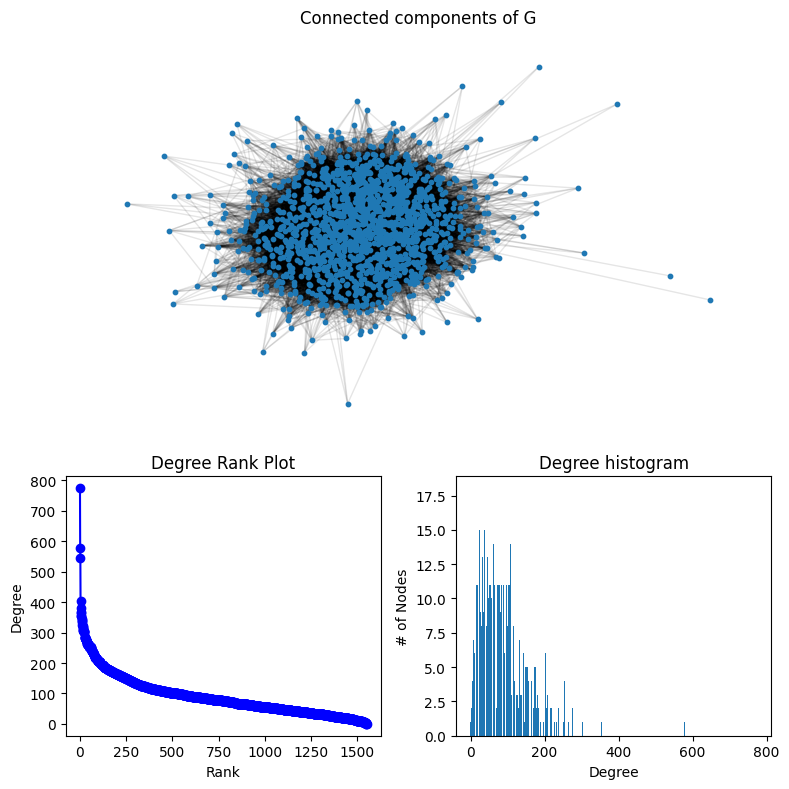

In [550]:
from torch_geometric.utils import subgraph
# subgraph_nodes = test_positive + test_negative
# label = np.concatenate(np.repeat(len(test_positive), 1), np.repeat(len(test_negative), 1))
subgraph_7103 = subgraph(test_positive, edge_index=edge_index_7103, num_nodes=13057)
subgraph_7103  = Data(edge_index=subgraph_7103[0])
subgraph_7103.num_nodes = len(test_positive)

G = utils.to_networkx(subgraph_7103, to_undirected=True)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=10)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
## For test negative proteins

Text(0.5, 1.0, 'Connected components of G')

Text(0.5, 1.0, 'Degree Rank Plot')

Text(0, 0.5, 'Degree')

Text(0.5, 0, 'Rank')

<BarContainer object of 157 artists>

Text(0.5, 1.0, 'Degree histogram')

Text(0.5, 0, 'Degree')

Text(0, 0.5, '# of Nodes')

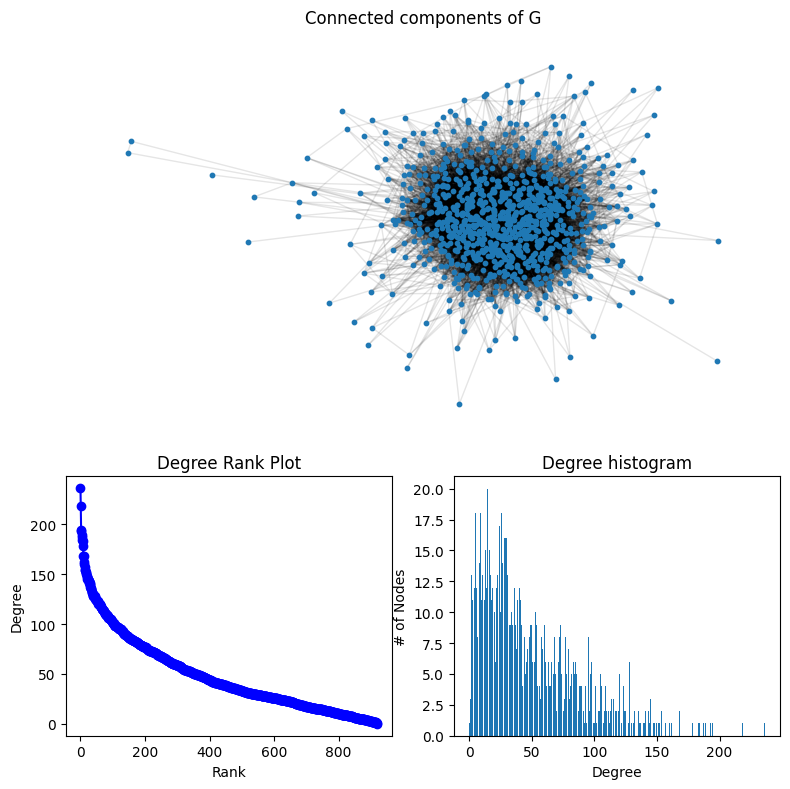

In [552]:
from torch_geometric.utils import subgraph
# subgraph_nodes = test_positive + test_negative
# label = np.concatenate(np.repeat(len(test_positive), 1), np.repeat(len(test_negative), 1))
subgraph_7103 = subgraph(test_negative, edge_index=edge_index_7103, num_nodes=13057)
subgraph_7103  = Data(edge_index=subgraph_7103[0])
subgraph_7103.num_nodes = len(test_negative)

G = utils.to_networkx(subgraph_7103, to_undirected=True)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=10)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [466]:
from torch_geometric.utils import subgraph
subgraph_7103 = subgraph(fdr_positive, edge_index=edge_index_7103, num_nodes=13057)
subgraph_7103  = Data(edge_index=subgraph_7103[0])
subgraph_7103.num_nodes = len(fdr_positive)

In [467]:
G = utils.to_networkx(subgraph_7103, to_undirected=True)

Text(0.5, 1.0, 'Connected components of G')

Text(0.5, 1.0, 'Degree Rank Plot')

Text(0, 0.5, 'Degree')

Text(0.5, 0, 'Rank')

<BarContainer object of 233 artists>

Text(0.5, 1.0, 'Degree histogram')

Text(0.5, 0, 'Degree')

Text(0, 0.5, '# of Nodes')

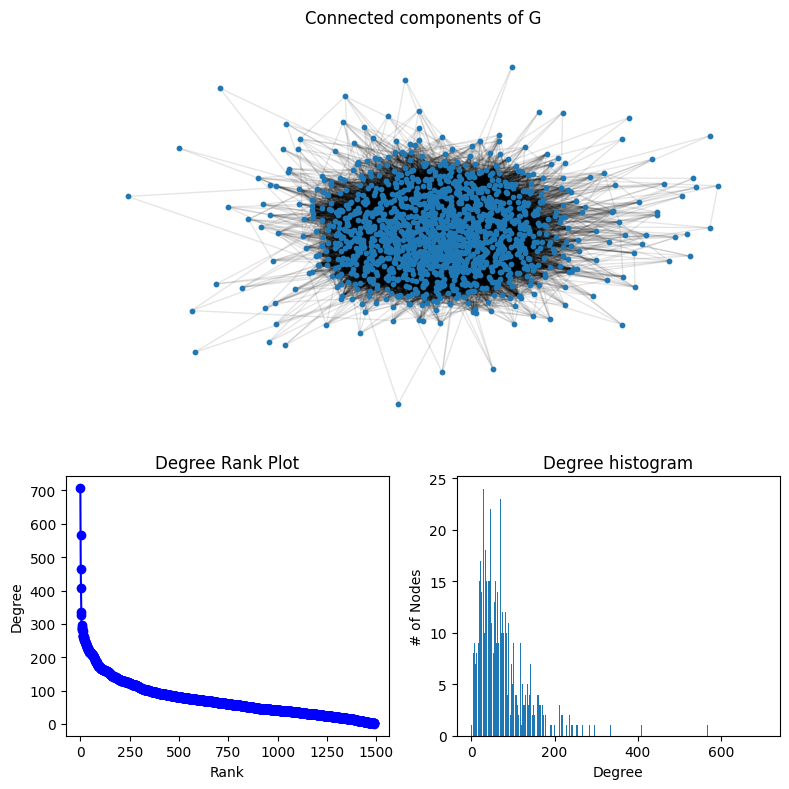

In [468]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=10)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [296]:
dataset = subgraph_7103
print(f'Number of nodes: {dataset.num_nodes}')
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of edges: {dataset.num_edges}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Average node degree: {dataset.num_edges / dataset.num_nodes:.2f}')
print(f'Has isolated nodes: {dataset.has_isolated_nodes()}')
print(f'Has self-loops: {dataset.has_self_loops()}')
print(f'Is undirected: {dataset.is_undirected()}')

Number of nodes: 1
Number of node features: 0
Number of edges: 69596
Number of edge features: 0
Average node degree: 69596.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


483

0.8640987761082887

Text(0.5, 1.0, 'Test ROC')

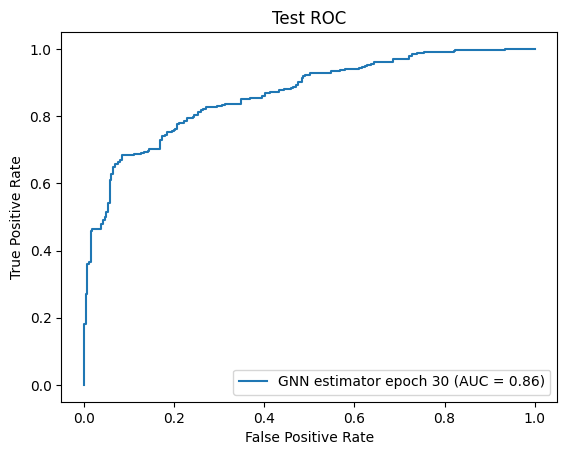

In [29]:

# load numpy array from csv file
from numpy import load
from sklearn import metrics
tpr = load('/Users/cgu3/Library/CloudStorage/OneDrive-InsideMDAnderson/PPI-project/pytorch_geometric/graphgym/data/output/tpr.npy')
fpr = load('/Users/cgu3/Library/CloudStorage/OneDrive-InsideMDAnderson/PPI-project/pytorch_geometric/graphgym/data/output/fpr.npy')
roc_auc = metrics.auc(fpr, tpr)
roc_auc
#  # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='GNN estimator epoch 30')
roc_display.plot()
plt.title('Test ROC')
plt.show()

In [36]:
pd.DataFrame({'fpr':fpr, 'tpr':tpr})

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.003135
2,0.000000,0.181818
3,0.003831,0.181818
4,0.003831,0.269592
...,...,...
150,0.823755,0.996865
151,0.934866,0.996865
152,0.934866,1.000000
153,0.984674,1.000000


NameError: name 'plt' is not defined

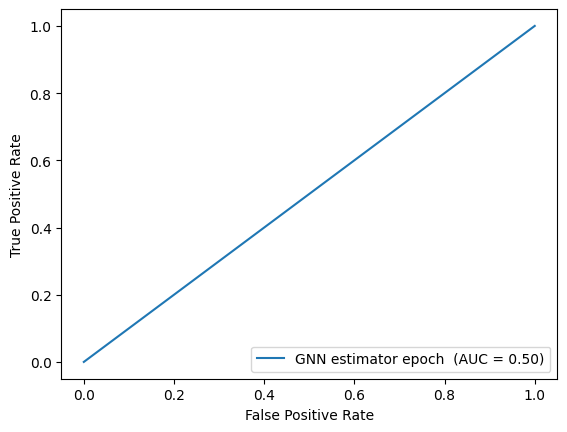